# Descubra as melhores notas de matemática do ENEM 2016

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e IN_TREINEIRO.

In [139]:
# importando bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# utiliza estilo seaborn
sns.set()

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import roc_curve

## Pré-Processamento

In [72]:
# carregamento dos dados
df_treino = pd.read_csv('train.csv')
df_teste = pd.read_csv('test.csv')

colunas = ['NU_INSCRICAO','NU_IDADE','TP_SEXO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ','IN_DISLEXIA',
           'IN_DISCALCULIA', 'IN_GESTANTE', 'IN_IDOSO', 'NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC',
           'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5', 'TP_ST_CONCLUSAO']

df_treino_mod = df_treino[colunas + ['IN_TREINEIRO']]
df_teste_mod = df_teste[colunas]
df_treino_mod.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_GESTANTE,IN_IDOSO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,TP_ST_CONCLUSAO,IN_TREINEIRO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,M,0,0,0,0,0,0,0,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,1,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,F,0,0,0,0,0,0,0,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,2,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,21,F,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,25,F,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,28,M,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


### Verifica Missing Values

In [73]:
df_treino_mod.isna().sum()

NU_INSCRICAO          0
NU_IDADE              0
TP_SEXO               0
IN_BAIXA_VISAO        0
IN_CEGUEIRA           0
IN_SURDEZ             0
IN_DISLEXIA           0
IN_DISCALCULIA        0
IN_GESTANTE           0
IN_IDOSO              0
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
TP_ST_CONCLUSAO       0
IN_TREINEIRO          0
dtype: int64

In [74]:
# trata valores nulos do conjunto de treino com zero
df_treino_mod = df_treino_mod.replace(np.nan, 0)

df_treino_mod.isna().sum()

NU_INSCRICAO       0
NU_IDADE           0
TP_SEXO            0
IN_BAIXA_VISAO     0
IN_CEGUEIRA        0
IN_SURDEZ          0
IN_DISLEXIA        0
IN_DISCALCULIA     0
IN_GESTANTE        0
IN_IDOSO           0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
TP_ST_CONCLUSAO    0
IN_TREINEIRO       0
dtype: int64

In [75]:
df_teste_mod.isna().sum()

NU_INSCRICAO          0
NU_IDADE              0
TP_SEXO               0
IN_BAIXA_VISAO        0
IN_CEGUEIRA           0
IN_SURDEZ             0
IN_DISLEXIA           0
IN_DISCALCULIA        0
IN_GESTANTE           0
IN_IDOSO              0
NU_NOTA_CN         1112
NU_NOTA_CH         1112
NU_NOTA_LC         1170
NU_NOTA_COMP1      1170
NU_NOTA_COMP2      1170
NU_NOTA_COMP3      1170
NU_NOTA_COMP4      1170
NU_NOTA_COMP5      1170
TP_ST_CONCLUSAO       0
dtype: int64

In [76]:
# trata valores nulos do conjunto de teste 
df_teste_mod = df_teste_mod.replace(np.nan, 0)

In [77]:
df_teste_mod.isna().sum()

NU_INSCRICAO       0
NU_IDADE           0
TP_SEXO            0
IN_BAIXA_VISAO     0
IN_CEGUEIRA        0
IN_SURDEZ          0
IN_DISLEXIA        0
IN_DISCALCULIA     0
IN_GESTANTE        0
IN_IDOSO           0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
TP_ST_CONCLUSAO    0
dtype: int64

### Feature Engineering

In [78]:
def trata_colunas(x):
    # cria coluna IN_DEFICIENTE
    soma_def = x['IN_BAIXA_VISAO'] + x['IN_CEGUEIRA'] + x['IN_SURDEZ'] + x['IN_CEGUEIRA'] + x['IN_DISLEXIA']
    if soma_def > 0:
        x['IN_DEFICIENTE'] = 1
    else:
        x['IN_DEFICIENTE'] = 0 
    
    # converte TP_SEXO para numérico M=>0 e F=>1
    x['TP_SEXO'] = 1 if x['TP_SEXO'] == 'F' else 0
    
    return x



df_treino_mod = df_treino_mod.apply(trata_colunas,axis=1)
df_treino_mod.drop(columns=['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ','IN_DISLEXIA'],axis=1,inplace=True)  
df_treino_mod.reset_index(inplace=True, drop=True)
df_treino_mod = pd.get_dummies(data=df_treino_mod, prefix_sep='_', columns=['TP_ST_CONCLUSAO'])

df_teste_mod = df_teste_mod.apply(trata_colunas,axis=1)
df_teste_mod.drop(columns=['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ','IN_DISLEXIA'],axis=1,inplace=True) 
df_teste_mod.reset_index(inplace=True,drop=True)
df_teste_mod = pd.get_dummies(data=df_teste_mod, prefix_sep='_', columns=['TP_ST_CONCLUSAO'])

df_treino_mod.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,IN_DISCALCULIA,IN_GESTANTE,IN_IDOSO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,IN_TREINEIRO,IN_DEFICIENTE,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,0,0,0,0,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,0,0,1,0,0,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,1,0,0,0,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,0,0,0,1,0,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,21,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,25,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,28,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0


In [79]:
df_treino_mod.shape

(13730, 20)

### Padronização dos Dados

In [86]:
# remove o target do dataframe antes de aplicar o scaler 
Y_treino = df_treino_mod['IN_TREINEIRO']

X_treino = df_treino_mod.copy()
del X_treino['NU_INSCRICAO']
del X_treino['IN_TREINEIRO']

X_teste = df_teste_mod.copy()
del X_teste['NU_INSCRICAO']

In [87]:
# cria o scaler e aplica nos dados de treinamento
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino_esc = scaler.transform(X_treino)
# converte dos os dados de teste com o scaler
X_teste_esc = scaler.transform(X_teste)

## Treinamento de Modelos
### Avaliação de Balanceamento das Categorias

<Figure size 864x648 with 0 Axes>

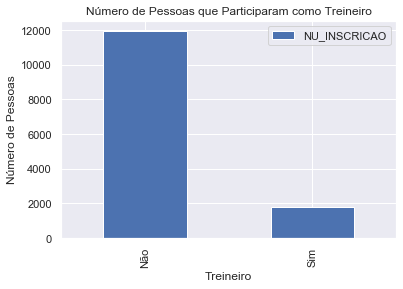

In [106]:
plt.figure(figsize=(12,9))
df_treino_mod[['IN_TREINEIRO','NU_INSCRICAO']].groupby(['IN_TREINEIRO']).count().plot(kind='bar')
plt.title('Número de Pessoas que Participaram como Treineiro')
plt.xlabel('Treineiro')
plt.xticks(ticks=[0,1], labels=['Não', 'Sim'],)
plt.ylabel("Número de Pessoas")
plt.show()

### Aplicando SMOTE para Oversample

In [108]:
smt = SMOTE()
X_treino_esc, Y_treino = smt.fit_sample(X_treino_esc, Y_treino)

In [109]:
np.bincount(Y_treino)

array([11947, 11947], dtype=int64)

### Randon Forest Classifier

In [121]:
model_rf = RandomForestClassifier()
model_rf.fit(X_treino_esc, Y_treino)
Y_pred_treino = model_rf.predict(X_treino_esc)

Y_pred_teste = model_rf.predict(X_teste_esc)

In [138]:
acc = accuracy_score(Y_treino,Y_pred_treino)
f1 = f1_score(Y_treino,Y_pred_treino)
print("Acurácia: ",acc)
print("F1-Score: ",f1)

Acurácia:  0.9982003850338997
F1-Score:  0.9982036178301373


#### Matrix de Confusão

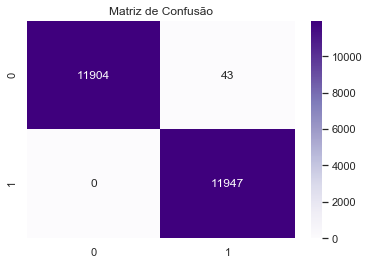

In [133]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_treino,Y_pred_treino),
           cmap='Purples',
           annot=True,
           fmt='d',
           vmin=0)
plt.title('Matriz de Confusão')
plt.show()

#### Curva ROC

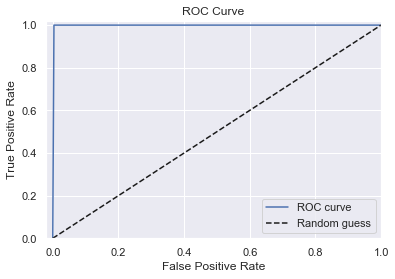

In [141]:
fpr, tpr, thresholds = roc_curve(Y_treino,Y_pred_treino)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

### Gerando Dados de Saída

In [142]:
answer = pd.DataFrame({'NU_INSCRICAO':df_teste_mod['NU_INSCRICAO'], 'IN_TREINEIRO':Y_pred_teste})

In [143]:
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [144]:
answer.to_csv('answer.csv',index=False)